In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

!unzip -qq ./chip_data.zip -d data

dataset_path = "./data/dataset/"

train_dataset = datasets.ImageFolder(
    root=f"{dataset_path}/train",
    transform=transform
)

test_dataset = datasets.ImageFolder(
    root=f"{dataset_path}/test",
    transform=transform
)

train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader  = DataLoader(test_dataset,batch_size=32,shuffle=False)

replace data/dataset/test/defect/D2_C97.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [64]:
from torchvision.models.vgg import VGG19_Weights

model = models.vgg19(weights=VGG19_Weights.DEFAULT)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [65]:
model.classifier[-1] = nn.Linear(
    model.classifier[-1].in_features,
    1
)

# Freeze feature layers
for param in model.features.parameters():
    param.requires_grad = False

In [66]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [69]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [70]:
model = model.to(device)

In [78]:
def train_model(model, train_loader, test_loader, epochs=10):

    train_losses = []
    val_losses = []

    for epoch in range(epochs):

        # -------- TRAIN --------
        model.train()
        running_loss = 0

        for images, labels in train_loader:

            images = images.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # -------- VALIDATION --------
        model.eval()
        val_loss = 0

        with torch.no_grad():
            for images, labels in test_loader:

                images = images.to(device)
                labels = labels.to(device).float().unsqueeze(1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()

        val_loss = val_loss / len(test_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print("Name:latchaya priyan S       ")
    print("Register Number: 212224230139       ")
    # Plot Loss
    plt.plot(train_losses,label="Train Loss")
    plt.plot(val_losses,label="Validation Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.show()

Epoch 1/10 | Train Loss: 0.0001 | Val Loss: 0.1770
Epoch 2/10 | Train Loss: 0.0022 | Val Loss: 0.1786
Epoch 3/10 | Train Loss: 0.0000 | Val Loss: 0.0950
Epoch 4/10 | Train Loss: 0.0016 | Val Loss: 0.2428
Epoch 5/10 | Train Loss: 0.0182 | Val Loss: 0.1888
Epoch 6/10 | Train Loss: 0.0018 | Val Loss: 0.1391
Epoch 7/10 | Train Loss: 0.0681 | Val Loss: 0.3588
Epoch 8/10 | Train Loss: 0.0798 | Val Loss: 0.5021
Epoch 9/10 | Train Loss: 0.0000 | Val Loss: 1.5404
Epoch 10/10 | Train Loss: 0.1263 | Val Loss: 0.7169
Name:latchaya priyan S       
Register Number: 212224230139       


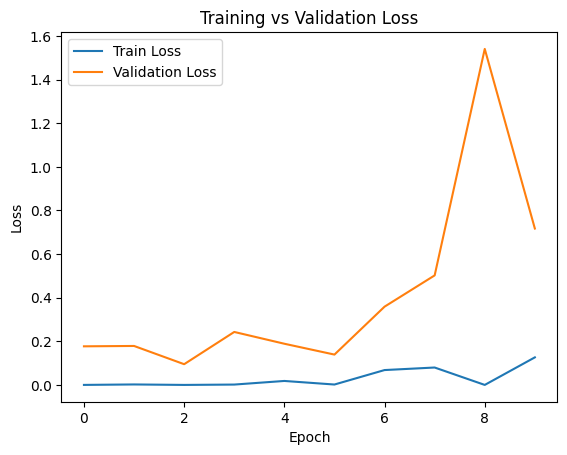

In [79]:
train_model(model,train_loader,test_loader)

In [80]:
def test_model(model,test_loader):

    model.eval()
    all_preds=[]
    all_labels=[]
    correct=0
    total=0

    with torch.no_grad():
        for images,labels in test_loader:
            images=images.to(device)
            labels=labels.to(device)

            outputs=model(images)
            probs=torch.sigmoid(outputs)
            preds=(probs>0.5).int().squeeze()

            correct+=(preds==labels).sum().item()
            total+=labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print("Name:latchaya priyan S       ")
    print("Register Number: 212224230139       ")
    print("Test Accuracy:",correct/total)

    cm=confusion_matrix(all_labels,all_preds)

    sns.heatmap(cm,annot=True,fmt="d",
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.title("Confusion Matrix")
    plt.show()

    print("\nClassification Report:\n")
    print(classification_report(
        all_labels,all_preds,
        target_names=train_dataset.classes))

Name:latchaya priyan S       
Register Number: 212224230139       
Test Accuracy: 0.9504132231404959


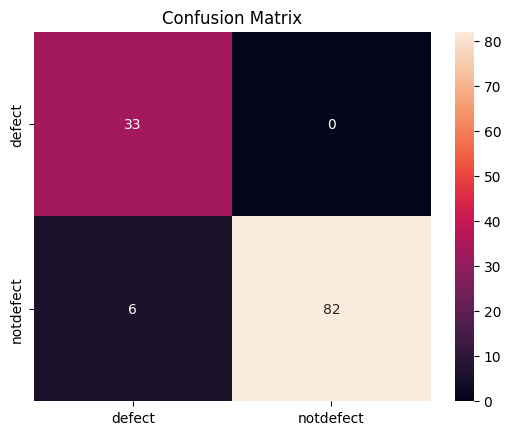


Classification Report:

              precision    recall  f1-score   support

      defect       0.85      1.00      0.92        33
   notdefect       1.00      0.93      0.96        88

    accuracy                           0.95       121
   macro avg       0.92      0.97      0.94       121
weighted avg       0.96      0.95      0.95       121



In [81]:
test_model(model,test_loader)

Name:latchaya priyan S       
Register Number: 212224230139       


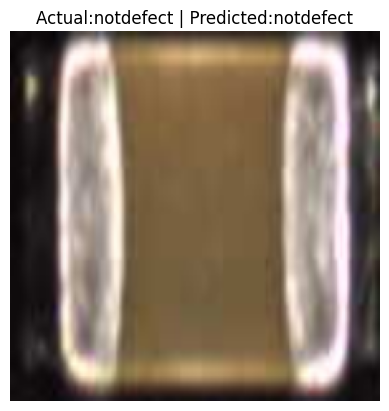

In [82]:
def predict_image(model,index,dataset):

    model.eval()
    image,label=dataset[index]

    with torch.no_grad():
        output=model(image.unsqueeze(0).to(device))
        prob=torch.sigmoid(output)
        pred=(prob>0.5).int().item()
    print("Name:latchaya priyan S       ")
    print("Register Number: 212224230139       ")
    plt.imshow(transforms.ToPILImage()(image))
    plt.title(f"Actual:{dataset.classes[label]} | Predicted:{dataset.classes[pred]}")
    plt.axis("off")
    plt.show()

predict_image(model,55,test_dataset)

Name:latchaya priyan S       
Register Number: 212224230139       


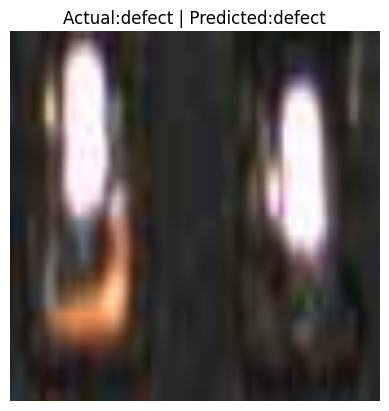

In [83]:
predict_image(model,25, test_dataset)